In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from xgboost import XGBClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/data


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/data


In [4]:
#Importing the dataset
data = pd.read_csv('diabetes_data_upload.csv')
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
data.shape

(520, 17)

In [7]:
data.info

<bound method DataFrame.info of      Age  Gender Polyuria  ... Alopecia Obesity     class
0     40    Male       No  ...      Yes     Yes  Positive
1     58    Male       No  ...      Yes      No  Positive
2     41    Male      Yes  ...      Yes      No  Positive
3     45    Male       No  ...       No      No  Positive
4     60    Male      Yes  ...      Yes     Yes  Positive
..   ...     ...      ...  ...      ...     ...       ...
515   39  Female      Yes  ...       No      No  Positive
516   48  Female      Yes  ...       No      No  Positive
517   58  Female      Yes  ...       No     Yes  Positive
518   32  Female       No  ...      Yes      No  Negative
519   42    Male       No  ...       No      No  Negative

[520 rows x 17 columns]>

In [8]:
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [10]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

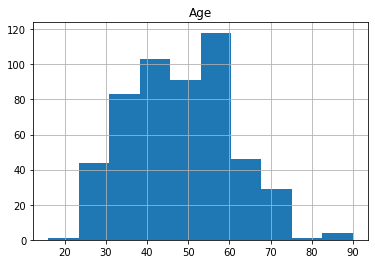

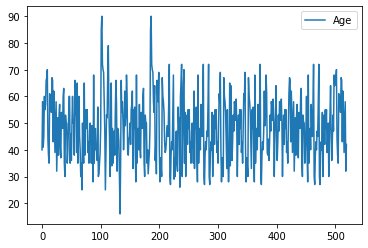

In [11]:
#Plotting the data
data.hist()
data.plot()

In [13]:
data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [91]:
data_gender = data["Gender"]
data_gender = pd.get_dummies(data_gender, drop_first=True)

In [92]:
data_polyuria = data["Polyuria"]
data_polyuria = pd.get_dummies(data_polyuria, drop_first=True)

In [93]:
data_polydipsia = data["Polydipsia"]
data_polydipsia = pd.get_dummies(data_polydipsia, drop_first=True)

In [94]:
data_weightloss = data["sudden weight loss"]
data_weightloss = pd.get_dummies(data_weightloss, drop_first=True)

In [95]:
data.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive


In [96]:
data_weakness = data["weakness"]
data_weakness = pd.get_dummies(data_weakness, drop_first=True)

In [97]:
data_class = data["class"]
data_class = pd.get_dummies(data_class, drop_first=True)

In [98]:
data_Polyphagia = data["Polyphagia"]
data_Polyphagia = pd.get_dummies(data_Polyphagia, drop_first=True)

In [99]:
data_genitalthrush = data["Genital thrush"]
data_genitalthrush = pd.get_dummies(data_genitalthrush, drop_first=True)

In [100]:
data_visualblurring = data["visual blurring"]
data_visualblurring = pd.get_dummies(data_visualblurring, drop_first=True)

In [101]:
data_Itching = data["Itching"]
data_Itching = pd.get_dummies(data_Itching, drop_first=True)

In [102]:
data_Itching = data["Itching"]
data_Itching = pd.get_dummies(data_Itching, drop_first=True)

In [103]:
data_Irritability = data["Irritability"]
data_Irritability = pd.get_dummies(data_Irritability, drop_first=True)

In [104]:
data.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive


In [105]:
data_partialparesis = data["partial paresis"]
data_partialparesis = pd.get_dummies(data_partialparesis, drop_first=True)

In [106]:
data_musclestiffness = data["muscle stiffness"]
data_musclestiffness = pd.get_dummies(data_musclestiffness, drop_first=True)

In [107]:
data_Alopecia = data["Alopecia"]
data_Alopecia = pd.get_dummies(data_Alopecia, drop_first=True)

In [108]:
data_Obesity = data["Obesity"]
data_Obesity = pd.get_dummies(data_Obesity, drop_first=True)

In [109]:
final_data = pd.concat([data, data_gender, data_polyuria, data_Obesity, data_Alopecia,data_musclestiffness, data_partialparesis, data_Irritability, data_Itching, data_visualblurring, data_genitalthrush,data_class
                        ], axis=1)

In [110]:
final_data.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,1,0,1,1,1,0,0,1,0,0,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,1,0,0,1,0,1,0,0,1,0,1


In [111]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [112]:
final_data = final_data.drop('Gender',1)

In [113]:
final_data = final_data.drop('Polyuria',1)

In [114]:
final_data = final_data.drop('Polydipsia',1)

In [115]:
final_data = final_data.drop('sudden weight loss',1)

In [116]:
final_data = final_data.drop('weakness',1)

In [117]:
final_data = final_data.drop('Polyphagia',1)

In [118]:
final_data = final_data.drop('Genital thrush',1)

In [119]:
final_data = final_data.drop('visual blurring',1)

In [120]:
final_data = final_data.drop('Itching',1)

In [121]:
final_data = final_data.drop('Irritability',1)

In [122]:
final_data = final_data.drop('delayed healing',1)

In [123]:
final_data = final_data.drop('partial paresis',1)

In [124]:
final_data = final_data.drop('muscle stiffness',1)

In [125]:
final_data = final_data.drop('Alopecia',1)

In [126]:
final_data = final_data.drop('Obesity',1)

In [127]:
final_data = final_data.drop('class',1)

In [128]:
final_data.head()

,Age,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
0,40,1,0,1,1,1,0,0,1,0,0,1
1,58,1,0,0,1,0,1,0,0,1,0,1
2,41,1,1,0,1,1,0,0,1,0,0,1
3,45,1,0,0,0,0,0,0,1,0,1,1
4,60,1,1,1,1,1,1,1,1,1,0,1


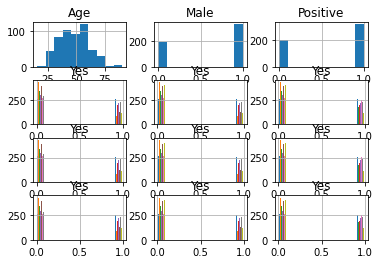

In [129]:
#Splitting the datasets
#Plotting the histogram
final_data.hist()
plt.show()

In [130]:
#Forming the correlation matrix
corr = final_data.corr()
corr

,Age,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
Age,1.000000,0.062872,0.199781,0.140458,0.321691,0.307703,0.232742,0.201625,0.296559,0.402729,0.096519,0.108679
Male,0.062872,1.000000,-0.268894,-0.005396,0.327871,-0.090542,-0.332288,-0.013735,-0.052496,-0.208092,0.208961,-0.449233
Yes,0.199781,-0.268894,1.000000,0.126567,-0.144192,0.152938,0.441664,0.237740,0.088289,0.235095,0.087273,0.665922
Yes,0.140458,-0.005396,0.126567,1.000000,0.029229,0.158910,-0.009401,0.127801,0.001894,0.109005,0.053828,0.072173
Yes,0.321691,0.327871,-0.144192,0.029229,1.000000,0.040758,-0.221576,0.043708,0.266506,0.014604,0.204847,-0.267512
Yes,0.307703,-0.090542,0.152938,0.158910,0.040758,1.000000,0.232634,0.201637,0.215575,0.412369,-0.100188,0.122474
Yes,0.232742,-0.332288,0.441664,-0.009401,-0.221576,0.232634,1.000000,0.151571,0.116669,0.364156,-0.195612,0.432288
Yes,0.201625,-0.013735,0.237740,0.127801,0.043708,0.201637,0.151571,1.000000,0.114006,0.077095,0.160551,0.299467
Yes,0.296559,-0.052496,0.088289,0.001894,0.266506,0.215575,0.116669,0.114006,1.000000,0.291191,0.125336,-0.013384
Yes,0.402729,-0.208092,0.235095,0.109005,0.014604,0.412369,0.364156,0.077095,0.291191,1.000000,-0.148408,0.251300


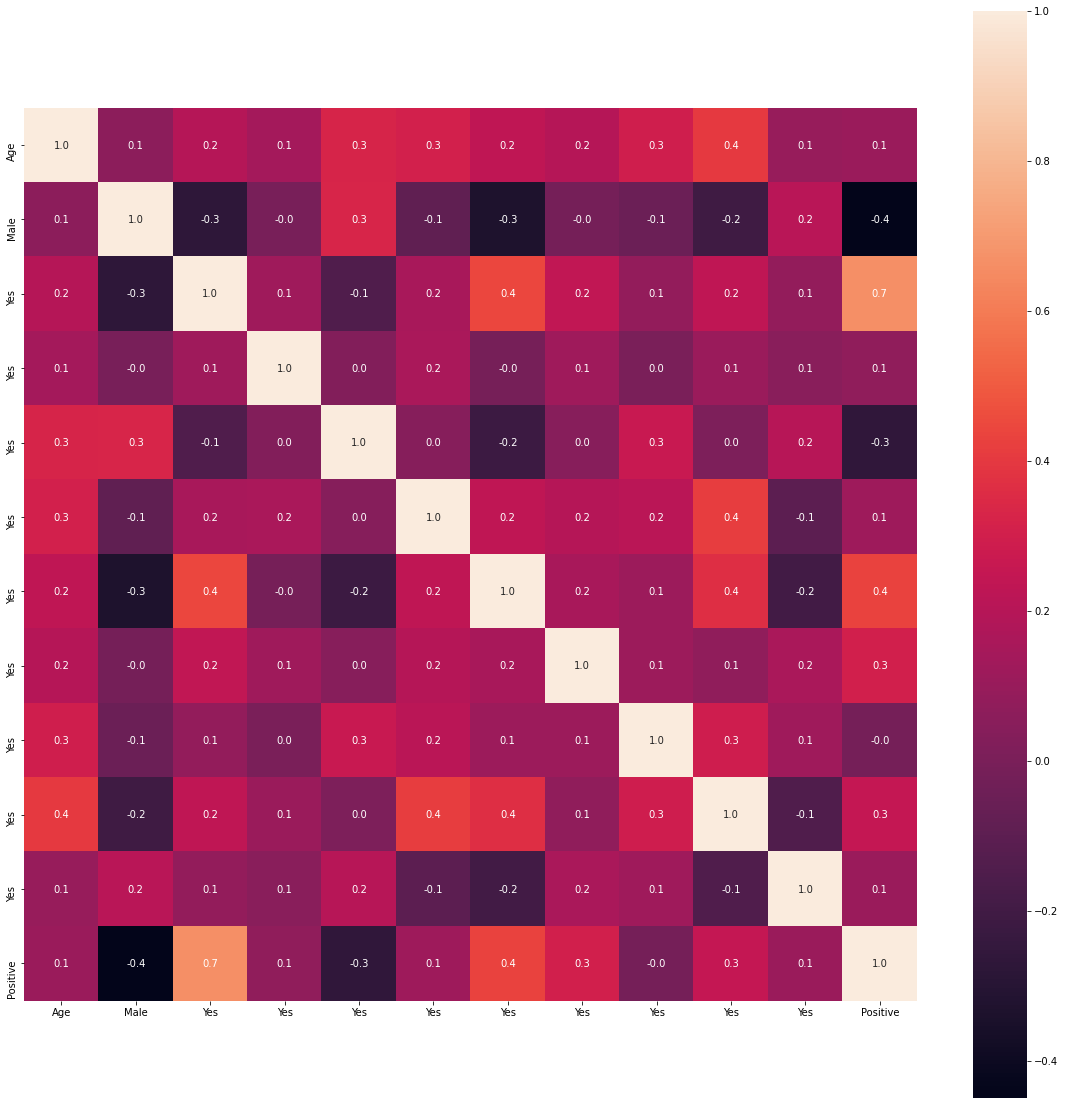

In [131]:
#Forming the heatmaps
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f' , annot= True)

In [132]:
final_data.columns

Index(['Age', 'Male', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Positive'],
      dtype='object')

In [133]:
x = final_data.loc[:,['Age', 'Male', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes']]

In [137]:
y = final_data.loc[: ,['Positive']]

In [138]:
x.head()

,Age,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
0,40,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0
1,58,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2,41,1,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0
3,45,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
4,60,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0


In [139]:
y.head()

,Positive
0,1
1,1
2,1
3,1
4,1


In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=0.25, random_state=0)

In [141]:
#Appling feature scalling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [143]:
os=RandomOverSampler(1)
X_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({'Positive': 1})
The number of classes after fit Counter({1: 246, 0: 246})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [144]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LR: 0.892308 (0.025123)
LDA: 0.866667 (0.037684)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

KNN: 0.856410 (0.040053)
DTC: 0.935897 (0.023640)
SVM: 0.902564 (0.034017)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RFC: 0.933333 (0.038376)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

ABC: 0.889744 (0.048718)
XGB: 0.935897 (0.036712)


In [145]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(3, 30, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

rf_params = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'criterion' : ['gini', 'entropy'],
             'max_depth' : max_depth,
             'min_samples_split' : min_samples_split,
             'min_samples_leaf' : min_samples_leaf}

print(rf_params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 9, 16, 23, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [146]:
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_params,
                                       scoring= 'roc_auc',
                                       n_jobs= -1, verbose= 3)

rf_random_search.fit(X_train_ns, y_train_ns)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.5s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [148]:
tuned_rf_classifier = RandomForestClassifier(n_estimators = 800,
                                             min_samples_split = 2,
                                             min_samples_leaf = 1,
                                             max_features = 'log2',
                                             max_depth = 16, 
                                             criterion = 'entropy')

tuned_rf_classifier.fit(X_train_ns, y_train_ns)
y_pred_tuned_rf = tuned_rf_classifier.predict(x_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print(accuracy_tuned_rf)

0.9307692307692308


In [149]:
rf = RandomForestClassifier()
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
y_pred_tuned_rf = rf.predict(x_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print(accuracy_tuned_rf)

0.9384615384615385


In [152]:
learning_rate = [float(x*0.01) for x in np.linspace(5, 100, num=10)]
max_depth = [int(x) for x in np.linspace(3, 60, num=10)]
gamma =  [float(x*0.1) for x in np.linspace(1, 10, num=10)]
colsample_bytree = [float(x*0.1) for x in np.linspace(1, 10, num=10)]

xgb_params={
 "learning_rate" : learning_rate ,
 "max_depth" : max_depth,
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma" : gamma,
 "colsample_bytree" : colsample_bytree 
}
print(xgb_params)

{'learning_rate': [0.05, 0.15555555555555556, 0.2611111111111111, 0.36666666666666664, 0.4722222222222222, 0.5777777777777778, 0.6833333333333333, 0.7888888888888889, 0.8944444444444445, 1.0], 'max_depth': [3, 9, 15, 22, 28, 34, 41, 47, 53, 60], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0], 'colsample_bytree': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]}


In [156]:
xgb_classifier = XGBClassifier(min_child_weight = 3,
                              max_depth = 28,
                              learning_rate = 0.4722222222222222,
                              gamma = 0.7000000000000001,
                              colsample_bytree = 0.8)
xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(accuracy_xgb)

0.9538461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
